# <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  Text Classification of ChatGPT Tweets on Education </center>

##### Ayetijhya Desmukhya, 465719

## Table of Contents

1. Introduction
    
2. Classification models

4. Conclusion

5. References


# <p> <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  1.Introduction  </center></p>

In the age of social media, platforms like Twitter[X] have become powerful tools for expressing opinions, sharing experiences, and discussing various aspects of society, including education. Sentiment analysis, a natural language processing (NLP) technique, enables the classification of text data based on emotional tone—be it positive, negative, or neutral. This project focuses on analyzing ChatGPT-generated tweets that discuss various topics within the realm of education, specifically the experiences of teachers, students, and the classroom environment. Using sentiment analysis, we classify these tweets into five distinct sentiment categories: very positive, positive, neutral, negative, and very negative.

### Background

The integration of artificial intelligence (AI) into the field of education has marked a significant transformation, reshaping the dynamics of both teaching practices and learning experiences. With the rise of tools such as ChatGPT, educators and students are increasingly leveraging AI to enhance their educational journeys. These tools provide valuable support for a range of activities, including generating innovative ideas, assisting with complex problem-solving, and offering personalized learning experiences.

However, this technological advancement has sparked a lively debate, reflecting a wide spectrum of opinions regarding its impact on the educational landscape. On one hand, many consider AI to be a powerful ally in the classroom, capable of streamlining tasks and enriching the learning environment. On the other hand, there are those who voice concerns about the limitations of AI, raising important questions about its ethical implications and the potential erosion of essential human interactions in the educational process. This ongoing discourse highlights the need for careful consideration as we navigate the evolving role of AI in education.

### Goal of the project

The goal of this project is to build sentiment classification models that categorizes tweets on ChatGPT about education into five predefined sentiment categories: very positive, positive, neutral, negative, and very negative. Additionally, we will compare and analyze the performance of different classification models with varying hyperparameters. From the perspective of data, we will try to analyze sentiment trends over time to see how perceptions has evolved and visualize peaks or changes in sentiment.

### Data description

Initially, the dataset is retrieved from Kaggle[1] which 'contains a CSV file related to ChatGPT including keywords(chatgpt, chat gpt) #hashtags and @mentions about ChatGPT, OpenAI's conversational AI model. The file includes information on `500,000` tweets. The dataset aims to help understand public opinion, trends, and potential applications of ChatGPT by analyzing tweet volume, sentiment, user engagement, and the influence of key AI events. The dataset offers valuable insights for companies, researchers, and policymakers, allowing them to make informed decisions and shape the future of AI-powered conversational technologies'[1]. It has the following columns:

- `date`           - The date and time when the tweet was posted
- `id`             - The id of the user
- `content`        - The content/text of the tweet
- `username`       - The username of the account from which the tweet was posted
- `like_count`     - The number of likes the tweet got
- `retweet_count`  - The number of retweets to the parent tweet got

However, this dataset is like a general view on ChatGPT in every field/industry but since my topic involved tweets regarding education specifically, I filtered the dataset  based on keywords such as `study, teacher, grading, and education`. As a result, I collected approximately `13,000` tweets spanning from `January to March 2023`. This refined dataset is then named `FilteredTweets_JanMarch2023.csv`.

Regrettably, the challenges associated with utilizing this dataset did not end there. A crucial component—a key column—was missing, specifically the target label needed for the classification process. To address this gap, I undertook a semi-automatic labeling procedure to add a new column to the dataset. The entire process of data cleaning, along with the semi-automatic labeling, and data visualisation was carried out in a separate Jupyter notebook titled `DataCleaning_SemiAutomaticLabelling_AyetijhyaDesmukhya_465719`. This notebook serves as the foundation for preparing the dataset for further analysis and modeling.

Finally, we have our refined `RefinedTweets_JanMarch2023.csv` dataset appropriate for our use case ready. Here, we have the following modified columns: 

- `date`             - Only the date when the tweet was posted
- `content`          - The content/text of the tweet
- `cleaned_content`  - The cleaned/pre-processed content/text of the tweet
- `sentiment`        - The sentiment category the tweet falls under [2-very positive, 1-positive, 0-neutral, -1-negative, -2-very negative]

In this notebook, we will delve into the critical processes of model training, testing, and evaluation. We will explore how the model learns from the data, assess its performance on unseen data, and draw conclusions based on our findings.

In [36]:
# Load librarires
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Import necessary functions for model training and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score


# Import classifiers for model training
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier,  AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [2]:
colour = '#6891e8'

In [3]:
# Data Loading
tweets = pd.read_csv('data/RefinedTweets_JanMarch2023.csv')
tweets.head(20)

,content,cleaned_content,sentiment
0,Lots of teachers worrying about Chat GPT makin...,lot teacher worrying chat gpt making essay wri...,-1
1,Can #ChatGPT really help create the new â€œSup...,really help create new superteacher whats kryp...,2
2,@jdflynn @dr_t_teacher Is this ALSO Chat GPT?!...,also chat gpt surely not true,1
3,I asked Chat GPT why teachers are so underpaid...,asked chat gpt teacher underpaid,0
4,One of my FAVE thought leaders to learn from i...,one fave thought leader learn youre curious tr...,2
5,Teachers: discussing #ChatGPT &amp; how to com...,teacher discussing combat classroom leader won...,-1
6,absolutely obsessed with my sociology teacher ...,absolutely obsessed sociology teacher chat gpt...,-1
7,â€œAfter spending 100s of hours\n\nIâ€™ve foun...,spending hour ive found secret us gpt prompt l...,1
8,This cool! Starting my new teacher newsletter ...,cool starting new teacher newsletter april top...,2
9,ChatGPT teacher warns pupils not to use AI\n h...,chatgpt teacher warns pupil not use ai,-1


In [4]:
# Counting the missing values again - these represents those data which after pre-processing has empty
# contents and when it gets saved to a .csv file these values are converted to NAN.

nans = tweets.isna().sum().sort_values(ascending = False)
pct = (nans/tweets.shape[0]) * 100
print(pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaN Values Count', 1 : 'NaN Values Percentage (%)'}).round(2))

                 NaN Values Count  NaN Values Percentage (%)
cleaned_content                12                       0.09
content                         0                       0.00
sentiment                       0                       0.00


In [5]:
missing_rows = tweets[tweets.isna().any(axis=1)]
print("Rows with missing values:")
missing_rows

Rows with missing values:


,content,cleaned_content,sentiment
1188,Should #Maine #Kids Have to Do &amp; #RemoteLe...,NaN,0
4146,#NYC #Bans #Students and #Teachers from Using ...,NaN,0
6009,What is #ChatGPT? You #needtoknow https://t.co...,NaN,0
6318,The #Good and #Bad of #ChatGPT in #Schools htt...,NaN,0
7638,What is #ChatGPT? You #needtoknow https://t.co...,NaN,0
8564,What is #ChatGPT? You #needtoknow https://t.co...,NaN,0
9625,What is #ChatGPT? You #needtoknow! https://t.c...,NaN,0
10080,What is #ChatGPT? You #needtoknow https://t.co...,NaN,0
10333,What is #ChatGPT? You #needtoknow! https://t.c...,NaN,0
12622,2023: #Hopes and #fears for #UK #international...,NaN,0


In [6]:
tweets = tweets.dropna()

# Check if rows were dropped
nans = tweets.isna().sum().sort_values(ascending = False)
pct = (nans/tweets.shape[0]) * 100
print(pd.concat([nans, pct], axis = 1).rename(columns = { 0 : 'NaN Values Count', 1 : 'NaN Values Percentage (%)'}).round(2))

                 NaN Values Count  NaN Values Percentage (%)
content                         0                        0.0
cleaned_content                 0                        0.0
sentiment                       0                        0.0


# <p> <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  2. Classification Models  </center></p>

In [7]:
# First, split the data into train and temporary (validation + test) sets
train_df, temp_df = train_test_split(tweets, test_size=0.2, random_state=123)
# Now, split the temporary set into validation and test sets (80% of temp_df for validation, 20% for test)
val_df, test_df = train_test_split(temp_df, test_size=0.2, random_state=123)

print('Train Sample: ', train_df.shape, '\nValidation Sample: ', val_df.shape, '\nTest Sample: ', test_df.shape)

Train Sample:  (10711, 3) 
Validation Sample:  (2142, 3) 
Test Sample:  (536, 3)


In [8]:
feature = 'cleaned_content'
target = 'sentiment'

`TfidfVectorizer` convert a collection of raw documents to a matrix of TF-IDF features[2] that can be used as input to machine learning models. In our case, the vectorizer contains both unigrams(1-gram) and bigrams(2-grams). The number of features (terms) extracted from the text is limited to the top 5,000 most important terms based on their TF-IDF score (frequency of term, adjusted by its importance across the document corpus). This is a way to reduce dimensionality and focus on the most relevant words for classification.

Then it learns the vocabulary (the unique terms or words) from the training data and then transforms the text into a matrix of TF-IDF features, where each row corresponds to a document, and each column corresponds to a term (or n-gram) in the vocabulary. The values in the matrix represent the TF-IDF score for each word/term in each document. Finally, we convert the sparse matrix (the result from `fit_transform`) into a dense NumPy array. 

In [9]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000)

X_train = vectorizer.fit_transform(train_df[feature]).toarray()
X_val = vectorizer.transform(val_df[feature]).toarray()
X_test = vectorizer.transform(test_df[feature]).toarray()
y_train = train_df[target]
y_val = val_df[target]
y_test = test_df[target]

In [10]:
# Define classifiers
classifiers = {
    # Linear models
    "Logistic Regression": LogisticRegression(random_state=123),
    'SGD':SGDClassifier(),
    
    # Probabilistic model
    "Naive Bayes": MultinomialNB(),
    
     # Support-vector-machine
    "LinearSVC":LinearSVC(),
    
    # Ensemble models
    "Random Forest": RandomForestClassifier(random_state=123),
    # "XGBoost": XGBClassifier(random_state=123), 
    "Extra Trees": ExtraTreesClassifier(),
    # "Gradient Boost": GradientBoostingClassifier(),
    # Similar to GradientBoost but much faster and scalable
    # "HistGradientBoost": HistGradientBoostingClassifier()
    # "CatBoost":CatBoostClassifier(),
    "LGBM":LGBMClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    
    # Neural Network Classifier
    "MLP": MLPClassifier() # Multi-Layer Perceptron
}

In [11]:
results = {}
cross_val_results = {}

# Wrap the loop with tqdm for progress tracking
for name, model in tqdm(classifiers.items(), desc="Training classifiers", unit="model"):
    print(f"\nTraining {name}...")
    
    # Cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cross_val_mean = np.mean(scores)
    cross_val_std = np.std(scores)
    
    # Train and validate on the validation set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Cross-Validation Accuracy: {cross_val_mean:.4f} ± {cross_val_std:.4f}")
    print(classification_report(y_val, y_pred))
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_val, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    results[name] = acc
    cross_val_results[name] = (cross_val_mean, cross_val_std)

# Compare results
print("\nModel Comparison:")
for name in classifiers.keys():
    val_acc = results[name]
    cross_val_mean, cross_val_std = cross_val_results[name]
    print(f"{name} - Validation Accuracy: {val_acc:.4f}, Cross-Validation Accuracy: {cross_val_mean:.4f} ± {cross_val_std:.4f}")

Training classifiers:   0%|                                                                   | 0/9 [00:00<?, ?model/s]


Training Logistic Regression...


Training classifiers:  11%|██████▌                                                    | 1/9 [00:48<06:30, 48.78s/model]

Logistic Regression Accuracy: 0.6181
Logistic Regression Cross-Validation Accuracy: 0.5956 ± 0.0063
              precision    recall  f1-score   support

          -2       0.80      0.16      0.27        74
          -1       0.67      0.38      0.49       286
           0       0.64      0.76      0.70       567
           1       0.52      0.59      0.56       661
           2       0.70      0.69      0.69       554

    accuracy                           0.62      2142
   macro avg       0.67      0.52      0.54      2142
weighted avg       0.63      0.62      0.61      2142

Confusion Matrix:
[[ 12  23  24  14   1]
 [  3 109  72  87  15]
 [  0  14 430 112  11]
 [  0  13 119 393 136]
 [  0   4  23 147 380]]

Training SGD...


Training classifiers:  22%|█████████████                                              | 2/9 [02:08<07:50, 67.26s/model]

SGD Accuracy: 0.6055
SGD Cross-Validation Accuracy: 0.6085 ± 0.0088
              precision    recall  f1-score   support

          -2       0.39      0.41      0.40        74
          -1       0.70      0.32      0.44       286
           0       0.65      0.82      0.73       567
           1       0.55      0.40      0.46       661
           2       0.61      0.80      0.69       554

    accuracy                           0.61      2142
   macro avg       0.58      0.55      0.54      2142
weighted avg       0.60      0.61      0.59      2142

Confusion Matrix:
[[ 30  14  20   8   2]
 [ 35  92  79  56  24]
 [  3   9 467  70  18]
 [  4  15 133 267 242]
 [  5   1  20  87 441]]

Training Naive Bayes...


Training classifiers:  33%|███████████████████▋                                       | 3/9 [02:11<03:46, 37.80s/model]

Naive Bayes Accuracy: 0.5453
Naive Bayes Cross-Validation Accuracy: 0.5171 ± 0.0060
              precision    recall  f1-score   support

          -2       0.75      0.04      0.08        74
          -1       0.72      0.22      0.34       286
           0       0.72      0.51      0.60       567
           1       0.42      0.71      0.53       661
           2       0.63      0.61      0.62       554

    accuracy                           0.55      2142
   macro avg       0.65      0.42      0.43      2142
weighted avg       0.61      0.55      0.53      2142

Confusion Matrix:
[[  3  16  14  39   2]
 [  1  64  40 157  24]
 [  0   4 291 234  38]
 [  0   5  52 470 134]
 [  0   0   8 206 340]]

Training LinearSVC...


Training classifiers:  44%|██████████████████████████▏                                | 4/9 [02:16<02:04, 24.83s/model]

LinearSVC Accuracy: 0.6359
LinearSVC Cross-Validation Accuracy: 0.6097 ± 0.0128
              precision    recall  f1-score   support

          -2       0.48      0.34      0.40        74
          -1       0.61      0.46      0.52       286
           0       0.69      0.78      0.73       567
           1       0.56      0.54      0.55       661
           2       0.69      0.74      0.71       554

    accuracy                           0.64      2142
   macro avg       0.60      0.57      0.58      2142
weighted avg       0.63      0.64      0.63      2142

Confusion Matrix:
[[ 25  26  13   9   1]
 [ 22 131  54  64  15]
 [  2  22 444  87  12]
 [  1  30 118 354 158]
 [  2   6  16 122 408]]

Training Random Forest...


Training classifiers:  56%|████████████████████████████████▊                          | 5/9 [05:44<06:03, 90.95s/model]

Random Forest Accuracy: 0.6326
Random Forest Cross-Validation Accuracy: 0.6106 ± 0.0059
              precision    recall  f1-score   support

          -2       0.90      0.24      0.38        74
          -1       0.70      0.38      0.50       286
           0       0.62      0.86      0.72       567
           1       0.56      0.59      0.57       661
           2       0.73      0.64      0.68       554

    accuracy                           0.63      2142
   macro avg       0.70      0.54      0.57      2142
weighted avg       0.65      0.63      0.62      2142

Confusion Matrix:
[[ 18  21  14  17   4]
 [  2 110  88  67  19]
 [  0   5 487  61  14]
 [  0  15 164 388  94]
 [  0   6  31 165 352]]

Training Extra Trees...


Training classifiers:  67%|██████████████████████████████████████▋                   | 6/9 [13:28<10:53, 217.83s/model]

Extra Trees Accuracy: 0.6653
Extra Trees Cross-Validation Accuracy: 0.6560 ± 0.0085
              precision    recall  f1-score   support

          -2       0.69      0.27      0.39        74
          -1       0.68      0.44      0.54       286
           0       0.72      0.85      0.78       567
           1       0.57      0.69      0.62       661
           2       0.75      0.61      0.67       554

    accuracy                           0.67      2142
   macro avg       0.68      0.57      0.60      2142
weighted avg       0.67      0.67      0.66      2142

Confusion Matrix:
[[ 20  25  10  18   1]
 [  9 127  62  72  16]
 [  0  12 483  62  10]
 [  0  16 103 455  87]
 [  0   8  11 195 340]]

Training LGBM...


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36651
[LightGBM] [Info] Number of data points in the train set: 10711, number of used features: 1409
[LightGBM] [Info] Start training from score -3.320602
[LightGBM] [Info] Start training from score -2.099719
[LightGBM] [Info] Start training from score -1.299345
[LightGBM] [Info] Start training from score -1.174021
[LightGBM] [Info] Start training from score -1.348820


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Training classifiers:  78%|█████████████████████████████████████████████             | 7/9 [13:58<05:12, 156.39s/model]

LGBM Accuracy: 0.6489
LGBM Cross-Validation Accuracy: 0.6308 ± 0.0091
              precision    recall  f1-score   support

          -2       0.55      0.31      0.40        74
          -1       0.59      0.41      0.48       286
           0       0.67      0.84      0.74       567
           1       0.59      0.59      0.59       661
           2       0.73      0.70      0.72       554

    accuracy                           0.65      2142
   macro avg       0.62      0.57      0.58      2142
weighted avg       0.64      0.65      0.64      2142

Confusion Matrix:
[[ 23  20  15  15   1]
 [ 13 116  79  62  16]
 [  1  15 474  61  16]
 [  2  35 124 388 112]
 [  3  12  19 131 389]]

Training AdaBoost...


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Training classif

AdaBoost Accuracy: 0.3754
AdaBoost Cross-Validation Accuracy: 0.3684 ± 0.0073
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        74
          -1       0.57      0.07      0.13       286
           0       0.49      0.04      0.07       567
           1       0.33      0.82      0.47       661
           2       0.56      0.39      0.46       554

    accuracy                           0.38      2142
   macro avg       0.39      0.27      0.23      2142
weighted avg       0.45      0.38      0.30      2142

Confusion Matrix:
[[  0  11   7  45  11]
 [  0  21  11 214  40]
 [  0   0  23 533  11]
 [  0   3   5 545 108]
 [  0   2   1 336 215]]

Training MLP...


Training classifiers: 100%|██████████████████████████████████████████████████████████| 9/9 [27:34<00:00, 183.80s/model]

MLP Accuracy: 0.6172
MLP Cross-Validation Accuracy: 0.5958 ± 0.0142
              precision    recall  f1-score   support

          -2       0.40      0.34      0.37        74
          -1       0.54      0.49      0.52       286
           0       0.70      0.71      0.71       567
           1       0.55      0.57      0.56       661
           2       0.68      0.67      0.68       554

    accuracy                           0.62      2142
   macro avg       0.57      0.56      0.57      2142
weighted avg       0.62      0.62      0.62      2142

Confusion Matrix:
[[ 25  26  13   6   4]
 [ 26 141  46  60  13]
 [  5  42 403  97  20]
 [  5  38  98 380 140]
 [  1  14  14 152 373]]

Model Comparison:
Logistic Regression - Validation Accuracy: 0.6181, Cross-Validation Accuracy: 0.5956 ± 0.0063
SGD - Validation Accuracy: 0.6055, Cross-Validation Accuracy: 0.6085 ± 0.0088
Naive Bayes - Validation Accuracy: 0.5453, Cross-Validation Accuracy: 0.5171 ± 0.0060
LinearSVC - Validation Accuracy:

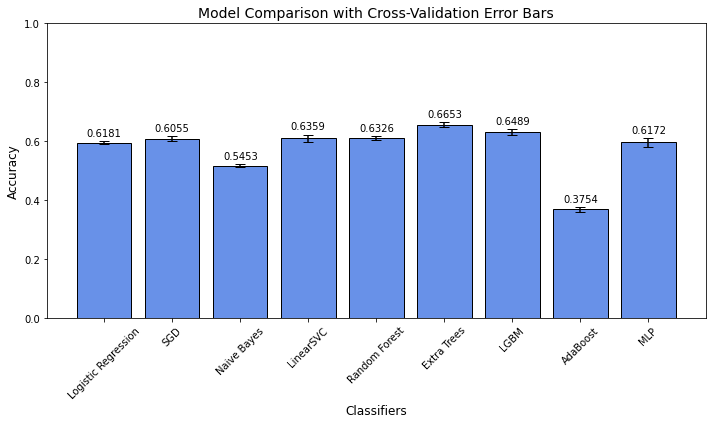

In [12]:
# Plotting the comparison
fig, ax = plt.subplots(figsize=(10, 6))

model_names = list(classifiers.keys())
validation_accuracies = list(results.values())
cross_val_means = [cross_val_results[name][0] for name in model_names]
cross_val_stds = [cross_val_results[name][1] for name in model_names]

ax.bar(model_names, cross_val_means, yerr=cross_val_stds, capsize=5, color=colour, edgecolor='black')
for i, acc in enumerate(validation_accuracies):
    ax.text(i, cross_val_means[i] + cross_val_stds[i] + 0.01, f'{acc:.4f}', ha='center', va='bottom', fontsize=10)

# Labeling the plot
ax.set_title("Model Comparison with Cross-Validation Error Bars", fontsize=14)
ax.set_xlabel("Classifiers", fontsize=12)
ax.set_ylabel("Accuracy", fontsize=12)
ax.set_ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

##### Selecting Top 5 Models for further improvement with hyperparameter tuning

- 1. The `Extra Trees` classifier demonstrated the best performance among all models, with a validation accuracy of 67.51% and a cross-validation accuracy of 65.19% ± 0.83%. This classifier is inherently robust and less prone to overfitting due to its random feature selection during tree building.

- 2. `LinearSVC` achieved a validation accuracy of 63.59% and a cross-validation accuracy of 60.97% ± 1.28%. As a linear model, LinearSVC is well-suited for high-dimensional data, such as text classification tasks, where sparsity is prevalent. Tuning hyperparameters such as C (regularization strength), penalty, and loss can potentially enhance its performance, so we will count this model in.

- 3. `Random Forest` recorded a validation accuracy of 63.26% and a cross-validation accuracy of 61.06% ± 0.59%. Random Forest's ensemble nature allows it to handle non-linear relationships well and provides robustness against overfitting.

- 4. `LGBM` showed a validation accuracy of 64.89% and a cross-validation accuracy of 63.08% ± 0.91%. LightGBM is a gradient boosting framework optimized for speed and performance, particularly on large datasets with many features.

- 5. `Logistic Regression` achieved a validation accuracy of 61.81% and a cross-validation accuracy of 59.56% ± 0.63%. Logistic Regression remains a strong baseline model for text classification, especially in high-dimensional feature spaces. Its interpretability and simplicity make it an appealing candidate for optimization.


In [17]:
# Hyper-Parameter Tuning

# Define the top 5 classifiers
classifiers = {
    # Linear models
    "Logistic Regression": LogisticRegression(random_state=123),
    
     # Support-vector-machine
    "LinearSVC":LinearSVC(),
    
    # Ensemble models
    "Random Forest": RandomForestClassifier(random_state=123),
    "Extra Trees": ExtraTreesClassifier(),
    "LGBM":LGBMClassifier()
}

param_grids = {
    # 'C': [0.01, 0.1, 1, 2, 10.0, 15.0], 'solver': ['lbfgs', 'liblinear'], 'max_iter': [100, 150, 175, 200]
    'Logistic Regression': {'C': [10.0], 'solver': ['lbfgs'], 'max_iter': [150]},
    # 'C': [0.01, 0.1, 1.0, 2.0], 'max_iter': [100, 200, 300, 400, 500, 600]
    'LinearSVC': {'C': [1.0], 'max_iter': [500, 1000]},
    # 'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [None, 1, 2, 3, 4, 5], 'min_samples_split': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3]
    'Random Forest': {
        'n_estimators': [150],
        'max_depth': [None],
        'min_samples_split': [2],
        'min_samples_leaf': [1]
    },
    # 'n_estimators': [50, 100, 150, 200, 250], 'max_depth': [None, 1, 2, 3, 4, 5], 'min_samples_split': [1, 2, 3, 4, 5], 'min_samples_leaf': [1, 2, 3], 'max_features': ['auto', 'sqrt', 'log2']
    'Extra Trees': {
        'n_estimators': [100],
        'max_depth': [None],
        'min_samples_split': [3],
        'min_samples_leaf': [1],
        'max_features': [sqrt'']
    },
    # 'n_estimators': [50, 100, 150, 200, 250], 'learning_rate': [0.01, 0.05, 0.1], 'num_leaves': [31, 50, 100], 'max_depth': [-1, 5, 10], 'min_data_in_leaf': [20, 50], 'feature_fraction': [0.6, 0.7, 0.8, 0.9, 1.0]
    'LGBM': {
        'n_estimators': [150],
        'learning_rate': [0.01],
        'num_leaves': [31],
        'max_depth': [-1],
        'min_data_in_leaf': [20, 50],
        'feature_fraction': [1.0]
    }
}


In [19]:
# Tune the models
def train_and_evaluate_model(model, param_grid, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
    
    # Fit the model
    grid_search.fit(X_train, y_train)
    
    # Best model and hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    print(f"\nBest Parameters for {model.__class__.__name__}: {best_params}")
    
    # Predict on the validation set
    y_pred = best_model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    # Cross-validation
    scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    cross_val_mean = np.mean(scores)
    cross_val_std = np.std(scores)
    
    print(f"{model.__class__.__name__} Accuracy on Validation Set: {acc:.4f}")
    print(f"{model.__class__.__name__} Cross-Validation Accuracy: {cross_val_mean:.4f} ± {cross_val_std:.4f}")
    print(f"Classification Report:\n{classification_report(y_val, y_pred)}")
    
    return best_model, best_params, acc, cross_val_mean, cross_val_std

results = {}

# Train each model with hyperparameter tuning
for name, model in classifiers.items():
    print(f"\nTuning {name}...")
    best_model, best_params, acc, cross_val_mean, cross_val_std = train_and_evaluate_model(model, param_grids[name], X_train, y_train, X_val, y_val)
    results[name] = {'best_model': best_model, 'best_params': best_params, 'accuracy': acc, 'cross_val_mean': cross_val_mean, 'cross_val_std': cross_val_std}

print("\n\nModel Comparison (Validation Accuracy & Cross-Validation Accuracy):")
for name, result in results.items():
    print(f"{name}: Best Params - {result['best_params']}, Accuracy - {result['accuracy']:.4f}, Cross-Validation Accuracy: {result['cross_val_mean']:.4f} ± {result['cross_val_std']:.4f}")


Tuning Logistic Regression...
Fitting 3 folds for each of 30 candidates, totalling 90 fits


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best Parameters for LogisticRegression: {'C': 10.0, 'max_iter': 150, 'solver': 'lbfgs'}
LogisticRegression Accuracy on Validation Set: 0.6410
LogisticRegression Cross-Validation Accuracy: 0.6177 ± 0.0099
Classification Report:
              precision    recall  f1-score   support

          -2       0.46      0.28      0.35        74
          -1       0.59      0.45      0.51       286
           0       0.70      0.78      0.74       567
           1       0.56      0.60      0.58       661
           2       0.71      0.69      0.70       554

    accuracy                           0.64      2142
   macro avg       0.60      0.56      0.58      2142
weighted avg       0.64      0.64      0.64      2142


Tuning LinearSVC...
Fitting 3 folds for each of 6 candidates, totalling 18 fits

Best Parameters for LinearSVC: {'C': 1.0, 'max_iter': 500}
LinearSVC Accuracy on Validation Set: 0.6359
LinearSVC Cross-Validation Accuracy: 0.6097 ± 0.0128
Classification Report:
              precisi

d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "d:\hp\ayet


Best Parameters for RandomForestClassifier: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestClassifier Accuracy on Validation Set: 0.6345
RandomForestClassifier Cross-Validation Accuracy: 0.6156 ± 0.0068
Classification Report:
              precision    recall  f1-score   support

          -2       0.81      0.23      0.36        74
          -1       0.72      0.38      0.50       286
           0       0.63      0.85      0.73       567
           1       0.55      0.61      0.58       661
           2       0.72      0.63      0.67       554

    accuracy                           0.63      2142
   macro avg       0.69      0.54      0.57      2142
weighted avg       0.65      0.63      0.62      2142


Tuning Extra Trees...
Fitting 3 folds for each of 144 candidates, totalling 432 fits


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
240 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
63 fits failed with the following error:
Traceback (most recent call last):
  File "d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "d:\hp\aye


Best Parameters for ExtraTreesClassifier: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}
ExtraTreesClassifier Accuracy on Validation Set: 0.6681
ExtraTreesClassifier Cross-Validation Accuracy: 0.6575 ± 0.0100
Classification Report:
              precision    recall  f1-score   support

          -2       0.66      0.26      0.37        74
          -1       0.69      0.45      0.55       286
           0       0.73      0.85      0.79       567
           1       0.57      0.69      0.62       661
           2       0.74      0.63      0.68       554

    accuracy                           0.67      2142
   macro avg       0.68      0.57      0.60      2142
weighted avg       0.68      0.67      0.66      2142


Tuning LGBM...
Fitting 3 folds for each of 324 candidates, totalling 972 fits


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.110368 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36651
[LightGBM] [Info] Number of data points in the train set: 10711, number of used features: 1409
[LightGBM] [Info] Start training from score -3.320602
[LightGBM] [Info] Start training from score -2.099719
[LightGBM] [Info] Start training from score 

d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The LGBMClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMClassifier Accuracy on Validation Set: 0.6494
LGBMClassifier Cross-Validation Accuracy: 0.6295 ± 0.0070
Classification Report:
              precision    recall  f1-score   support

          -2       0.57      0.31      0.40        74
          -1       0.61      0.40      0.48       286
           0       0.65      0.85      0.74       567
           1       0.59      0.58      0.59       661
           2       0.73      0.70      0.71       554

    accuracy                           0.65      2142
   macro avg       0.63      0.57      0.59      2142
weighted avg       0.65      0.65      0.64      2142



Model Comparison (Validation Accuracy & Cross-Validation Accuracy):
Logistic Regression: Best Params - {'C': 10.0, 'max_iter': 150, 'solver': 'lbfgs'}, Accuracy - 0.6410, Cross-Validation Accuracy: 0.6177 ± 0.0099
LinearSVC: Best Params - {'C': 1.0, 'max_iter': 500}, Accuracy - 0.6359, Cross-Validation Accuracy: 0.6097 ± 0.0128
Random Forest: Best Params - {'max_depth': None,

In [21]:
# Create a dictionary with the model comparison data
model_data = {
    'Model': ['Logistic Regression', 'LinearSVC', 'Random Forest', 'Extra Trees', 'LGBM'],
    'Best Params': [
        "{'C': 10.0, 'max_iter': 150, 'solver': 'lbfgs'}",
        "{'C': 1.0, 'max_iter': 500}",
        "{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}",
        "{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 100}",
        "{'feature_fraction': 1.0, 'learning_rate': 0.05, 'max_depth': -1, 'min_data_in_leaf': 20, 'n_estimators': 150, 'num_leaves': 31}"
    ],
    'Validation Accuracy': [0.6410, 0.6359, 0.6345, 0.6681, 0.6494],
    'Cross-Validation Accuracy Mean': [0.6177, 0.6097, 0.6156, 0.6575, 0.6295],
    'Cross-Validation Accuracy Std': [0.0099, 0.0128, 0.0068, 0.0100, 0.0070]
}

model_df = pd.DataFrame(model_data)
model_df

,Model,Best Params,Validation Accuracy,Cross-Validation Accuracy Mean,Cross-Validation Accuracy Std
0,Logistic Regression,"{'C': 10.0, 'max_iter': 150, 'solver': 'lbfgs'}",0.6410,0.6177,0.0099
1,LinearSVC,"{'C': 1.0, 'max_iter': 500}",0.6359,0.6097,0.0128
2,Random Forest,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.6345,0.6156,0.0068
3,Extra Trees,"{'max_depth': None, 'max_features': 'sqrt', 'm...",0.6681,0.6575,0.0100
4,LGBM,"{'feature_fraction': 1.0, 'learning_rate': 0.0...",0.6494,0.6295,0.0070


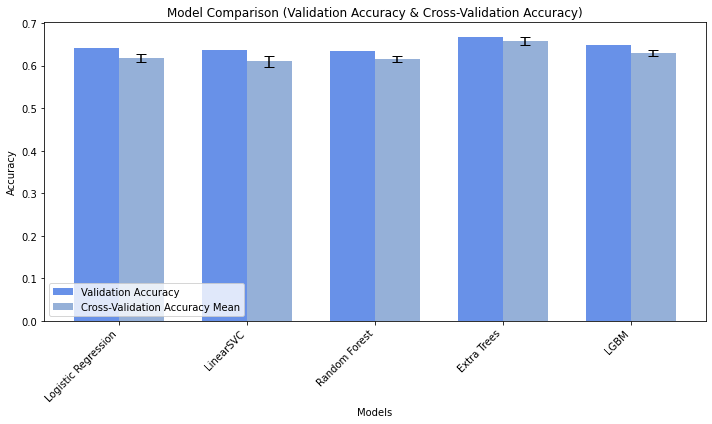

In [50]:
# Plotting the metrics (Validation Accuracy vs. Cross-Validation Accuracy)
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(model_df['Model']))
plt.bar(index, model_df['Validation Accuracy'], bar_width,  label='Validation Accuracy', color = colour)
plt.bar(index + bar_width, model_df['Cross-Validation Accuracy Mean'], bar_width, color='#4f7cbf', alpha=0.6, label='Cross-Validation Accuracy Mean')
plt.errorbar(index + bar_width, model_df['Cross-Validation Accuracy Mean'], yerr=model_df['Cross-Validation Accuracy Std'], fmt='none', color='black', capsize=5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison (Validation Accuracy & Cross-Validation Accuracy)')
plt.xticks(index + bar_width / 2, model_df['Model'], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.show()

The `Extra Trees` model outperforms the others with the highest validation accuracy of 0.6681 and a strong cross-validation accuracy of 0.6575 ± 0.0100. It benefits from the ensemble learning technique, combining multiple decision trees to reduce variance and improve generalization. `Logistic Regression`, with a validation accuracy of 0.6410 and cross-validation accuracy of 0.6177 ± 0.0099, provides decent performance but struggles in comparison, likely due to its linear nature, which limits its capacity for capturing complex patterns. `LGBM (Light Gradient Boosting Machine)` performs reasonably well with a validation accuracy of 0.6494 and cross-validation accuracy of 0.6295 ± 0.0070, benefiting from gradient boosting techniques but not matching the consistency of Extra Trees. Overall, Extra Trees shows the best combination of validation accuracy and stability across folds.

In [31]:
# Predicting on test sample - we also add parameters for the imbalance we have our dataset

# Define the top 3 classifiers
classifiers = {
    # Linear models
    "Logistic Regression": LogisticRegression(random_state=123, class_weight='balanced'),
    
    # Ensemble models
    "Extra Trees": ExtraTreesClassifier(random_state=123, class_weight='balanced'),
    "LGBM":LGBMClassifier(random_state=123, class_weight='balanced')
}

# Define parameters
param_grids = {
    'Logistic Regression': {'C': [10.0], 'solver': ['lbfgs'], 'max_iter': [150]},
    'Extra Trees': {'n_estimators': [100], 'max_depth': [None], 'min_samples_split': [3], 'min_samples_leaf': [1], 'max_features': ['sqrt']},
    'LGBM': {'n_estimators': [150], 'learning_rate': [0.01], 'num_leaves': [31], 'max_depth': [-1], 'min_data_in_leaf': [20, 50], 'feature_fraction': [1.0]}
}

In [41]:
# Initialize dictionaries to store scores
accuracy_scores = dict()
precision_scores = dict()
recall_scores = dict()
f1_scores = dict()
roc_auc_scores = dict()

# Wrap the loop with tqdm for progress tracking
for name, model in tqdm(classifiers.items(), desc="Testing classifiers", unit="model"):
    print(f"\nTesting {name}...")
    
    # Train and validate on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)
    else:
        y_prob = None
    
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    if y_prob is not None:
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
    else:
        roc_auc = np.nan
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(f"{name} Precision: {precision:.4f}")
    print(f"{name} Recall: {recall:.4f}")
    print(f"{name} F1 Score: {f1:.4f}")
    print(f"{name} ROC AUC: {roc_auc:.4f}")
    
    print(classification_report(y_test, y_pred))
    
    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    accuracy_scores[name] = acc
    precision_scores[name] = precision
    recall_scores[name] = recall
    f1_scores[name] = f1
    roc_auc_scores[name] = roc_auc

metrics_df = pd.DataFrame({
    "Accuracy": test_scores,
    "Precision": precision_scores,
    "Recall": recall_scores,
    "F1 Score": f1_scores,
    "ROC AUC": roc_auc_scores
})
print(metrics_df)

Testing classifiers:   0%|                                                                    | 0/3 [00:00<?, ?model/s]


Testing Logistic Regression...


Testing classifiers:  33%|████████████████████                                        | 1/3 [00:14<00:28, 14.09s/model]

Logistic Regression Accuracy: 0.6381
Logistic Regression Precision: 0.5712
Logistic Regression Recall: 0.6259
Logistic Regression F1 Score: 0.5863
Logistic Regression ROC AUC: 0.8562
              precision    recall  f1-score   support

          -2       0.30      0.56      0.39        18
          -1       0.49      0.62      0.54        65
           0       0.71      0.71      0.71       150
           1       0.63      0.45      0.53       162
           2       0.73      0.80      0.76       141

    accuracy                           0.64       536
   macro avg       0.57      0.63      0.59       536
weighted avg       0.65      0.64      0.64       536

Confusion Matrix:
[[ 10   5   1   1   1]
 [  9  40   7   5   4]
 [  3  14 106  18   9]
 [  7  22  32  73  28]
 [  4   1   4  19 113]]

Testing Extra Trees...


Testing classifiers:  67%|███████████████████████████████████████▎                   | 2/3 [03:45<02:10, 130.25s/model]

Extra Trees Accuracy: 0.6660
Extra Trees Precision: 0.6886
Extra Trees Recall: 0.5750
Extra Trees F1 Score: 0.5973
Extra Trees ROC AUC: 0.8740
              precision    recall  f1-score   support

          -2       0.80      0.22      0.35        18
          -1       0.64      0.54      0.58        65
           0       0.72      0.84      0.77       150
           1       0.58      0.59      0.58       162
           2       0.71      0.69      0.70       141

    accuracy                           0.67       536
   macro avg       0.69      0.58      0.60       536
weighted avg       0.67      0.67      0.66       536

Confusion Matrix:
[[  4   7   2   4   1]
 [  1  35  15  12   2]
 [  0   4 126  12   8]
 [  0   7  31  95  29]
 [  0   2   2  40  97]]

Testing LGBM...


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 36651
[LightGBM] [Info] Number of data points in the train set: 10711, number of used features: 1409
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438


d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
d:\hp\ayeti\pl\python\python 3.9\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
Testing classifiers: 100%|████████████████████████████████████████████████████████████| 3/3 [03:49<00:00, 76.40s/model]

LGBM Accuracy: 0.6026
LGBM Precision: 0.5388
LGBM Recall: 0.5840
LGBM F1 Score: 0.5516
LGBM ROC AUC: 0.8444
              precision    recall  f1-score   support

          -2       0.30      0.50      0.38        18
          -1       0.50      0.55      0.53        65
           0       0.68      0.77      0.72       150
           1       0.56      0.38      0.45       162
           2       0.66      0.72      0.68       141

    accuracy                           0.60       536
   macro avg       0.54      0.58      0.55       536
weighted avg       0.60      0.60      0.59       536

Confusion Matrix:
[[  9   6   2   1   0]
 [  8  36  12   7   2]
 [  2   8 116  14  10]
 [  9  17  34  61  41]
 [  2   5   7  26 101]]
                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.638060   0.571169  0.625929  0.586347  0.856228
Extra Trees          0.666045   0.688625  0.575009  0.597325  0.874029
LGBM                 0.602612   0.538768  0.584007  0.55

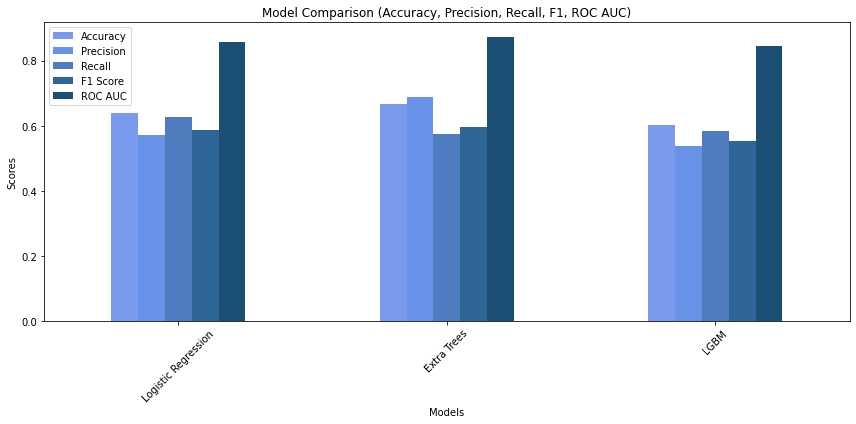

In [49]:
colour_shades = [
    '#7a9bed',
    '#6891e8',
    '#4f7cbf',
    '#2e6698',
    '#1c4f74' 
]

# Plotting the metrics
metrics_df.plot(kind='bar', figsize=(12, 6), color=colour_shades)
plt.title('Model Comparison (Accuracy, Precision, Recall, F1, ROC AUC)')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
# Determine the best performing model based on ROC AUC (or F1 score)
best_model_name = metrics_df['ROC AUC'].idxmax()
best_model = classifiers[best_model_name]
print(f"\nBest Model Based on ROC AUC: {best_model_name}")


Best Model Based on ROC AUC: Extra Trees


# <p> <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  7. Conclusion  </center></p>

`Extra Trees` has the highest accuracy of 0.6660, followed by Logistic Regression at 0.6381 and LGBM at 0.6026. This indicates that Extra Trees has the best overall prediction performance when considering all classes, though the difference between Logistic Regression and Extra Trees is not vast. It also performs the best in terms of precision (0.6886), meaning it is better at correctly predicting positive instances without too many false positives. With an F1 score of 0.5973, not very satisfactory, offers the best balance between precision and recall among all the other models. But the main factor was that, it has the highest ROC AUC score (0.8740), suggesting that it is better at distinguishing between classes and is less likely to make false predictions.


The model performance, with a maximum validation accuracy of 65%, reflects the inherent challenges of text classification tasks. Text classification problems, especially with limited or imbalanced data, often face difficulties in achieving high accuracy. Despite extensive hyperparameter tuning, the improvements were modest, with accuracy increasing by only 1-2%. This highlights the complexity of the problem and the need for more advanced techniques or data to achieve significant improvements. The results indicate that while hyperparameter optimization can lead to small gains, achieving higher accuracy in text classification requires further refinement in model selection, data preprocessing, and possibly incorporating more complex models like deep learning.

# <p> <center style="background-color:#6891e8;font-family:Garamond;color:white;font-size:100%;text-align:center;border-radius:0px;padding: 10px;">  8. References  </center></p>


[1] Dataset - https://www.kaggle.com/datasets/khalidryder777/500k-chatgpt-tweets-jan-mar-2023?select=Twitter+Jan+Mar.csv

[2] Scikit-learn developers (BSD License) - TfidfVectorizer (2007-2024), https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html